In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_21.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,10,17,18,19,23,24,27,30,32,34,39,40,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 10095


# General EDA

In [78]:
df.head()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
0,[],False,NaN,Admirable_Share_5843,1.624339e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
1,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
2,[],False,NaN,dancing_chinese_kid,1.475164e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
3,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
4,[],False,NaN,excodaIT,1.612285e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN


In [79]:
df.tail()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
150815,[],False,NaN,Difficult_Buffalo327,1.622590e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150816,[],False,NaN,Darknatio,1.631227e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150817,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150818,[],False,NaN,bilbosdottir,1.548805e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150819,[],False,NaN,wigglebuttbiscuits,1.558750e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150822 entries, 0 to 150819
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    150822 non-null  object 
 1   archived                         150822 non-null  bool   
 2   associated_award                 0 non-null       float64
 3   author                           150820 non-null  object 
 4   author_created_utc               127995 non-null  float64
 5   author_flair_background_color    0 non-null       float64
 6   author_flair_css_class           2 non-null       float64
 7   author_flair_richtext            128214 non-null  object 
 8   author_flair_template_id         0 non-null       float64
 9   author_flair_text                2 non-null       object 
 10  author_flair_text_color          22610 non-null   object 
 11  author_flair_type                128214 non-null  object 
 12  author_

In [81]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   150822
author                                  2
author_created_utc                  22827
author_flair_background_color      150822
author_flair_css_class             150820
author_flair_richtext               22608
author_flair_template_id           150822
author_flair_text                  150820
author_flair_text_color            128212
author_flair_type                   22608
author_fullname                     22608
author_patreon_flair                22608
author_premium                      22608
body                                    1
can_gild                                2
collapsed                               2
collapsed_because_crowd_control    150820
collapsed_reason                   148640
collapsed_reason_code              130026
comment_type                       150820
controversiality                        2
created_utc                       

In [82]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_cakeday', 'editable'],
      dtype='obje

In [83]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,comment_type,retrieved_on,score,top_awarded_type,total_awards_received,unrepliable_reason
count,0.0,1.279950e+05,0.0,2.0,0.0,2.0,1.508180e+05,150818.000000,0.0,150818.000000,0.0
mean,NaN,1.512167e+09,NaN,0.0,NaN,1.0,1.646012e+09,11.789289,NaN,0.007406,NaN
std,NaN,1.087008e+08,NaN,0.0,NaN,0.0,8.844940e+04,69.090935,NaN,0.166654,NaN
min,NaN,1.132031e+09,NaN,0.0,NaN,1.0,1.645859e+09,-406.000000,NaN,0.000000,NaN
25%,NaN,1.434308e+09,NaN,0.0,NaN,1.0,1.645934e+09,1.000000,NaN,0.000000,NaN
50%,NaN,1.545973e+09,NaN,0.0,NaN,1.0,1.646013e+09,2.000000,NaN,0.000000,NaN
75%,NaN,1.604850e+09,NaN,0.0,NaN,1.0,1.646089e+09,5.000000,NaN,0.000000,NaN
max,NaN,1.638306e+09,NaN,0.0,NaN,1.0,1.646162e+09,4324.000000,NaN,29.000000,NaN


# One Feature EDA

# Controversialty

0        114264
0         31770
1          3790
1           994
False         2
Name: controversiality, dtype: int64


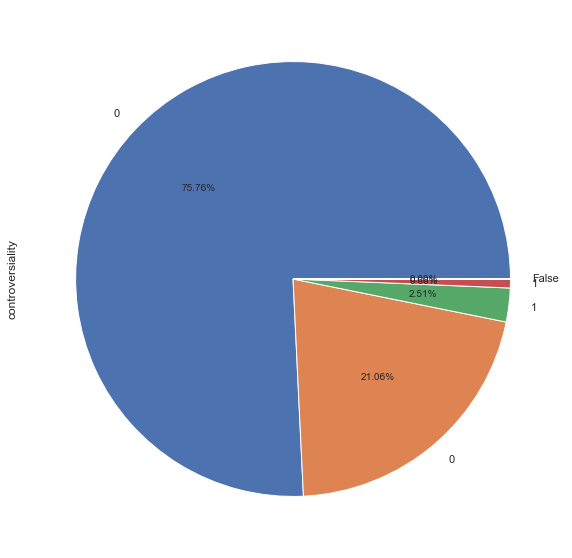

In [84]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Converting Controversiality values and deleting unimportant rows

In [85]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [86]:
df['controversiality'] = df['controversiality'].replace("False",'0')

0    146036
1      4784
Name: controversiality, dtype: int64


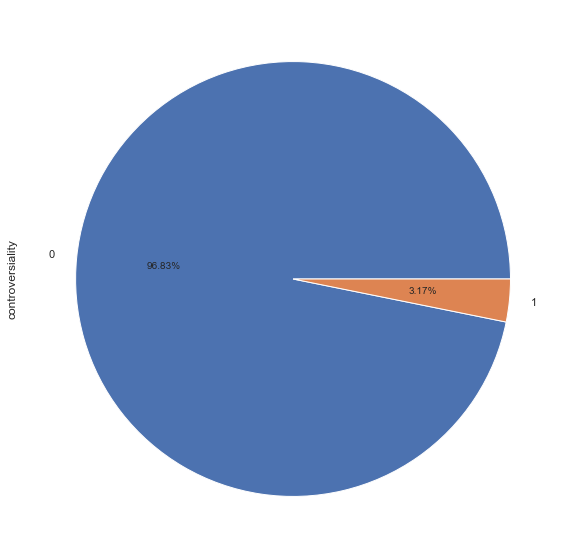

In [87]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [88]:
df[df['controversiality'].isna()].iloc[0]

all_awardings                             []
archived                               False
associated_award                         NaN
author                             [deleted]
author_created_utc                       NaN
author_flair_background_color            NaN
author_flair_css_class                   NaN
author_flair_richtext                    NaN
author_flair_template_id                 NaN
author_flair_text                        NaN
author_flair_text_color                 dark
author_flair_type                        NaN
author_fullname                          NaN
author_patreon_flair                     NaN
author_premium                           NaN
body                                     NaN
can_gild                                 NaN
collapsed                                NaN
collapsed_because_crowd_control          NaN
collapsed_reason                         NaN
collapsed_reason_code                    NaN
comment_type                             NaN
controvers

In [89]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen
# Hier ist der vorhandene DataFrame df

# Lösche die erste Zeile, bei der 'controversiality' NaN ist
df = df.drop(df[df['controversiality'].isna()].index[0])

# Jetzt enthält 'df' den DataFrame ohne die erste Zeile mit NaN in 'controversiality'


In [90]:
df[df['controversiality'].isna()]["body"]

82285    there are restaurants that have an open balcon...
Name: body, dtype: object

0    146036
1      4784
Name: controversiality, dtype: int64


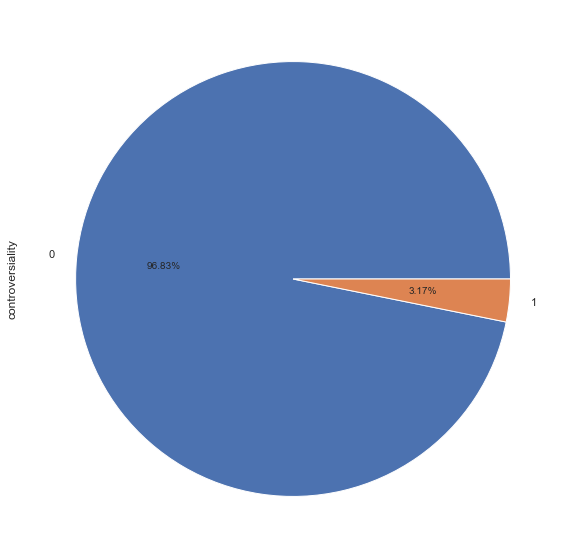

In [91]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [92]:
df["controversiality"].unique()

array(['0', '1', nan], dtype=object)

In [93]:
df[df['controversiality'].isna()]["created_utc"]

82285    NaN
Name: created_utc, dtype: object

In [94]:
df = df.drop(df[df['controversiality'].isna()].index[0])

0    146036
1      4784
Name: controversiality, dtype: int64


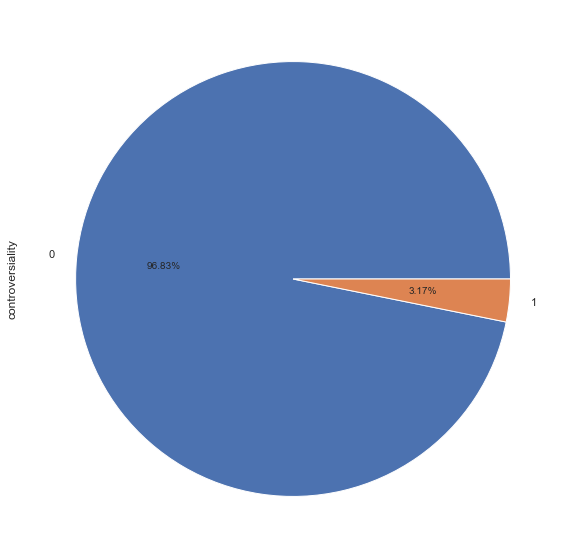

In [95]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [96]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

# Stickied

False    150818
Name: stickied, dtype: int64


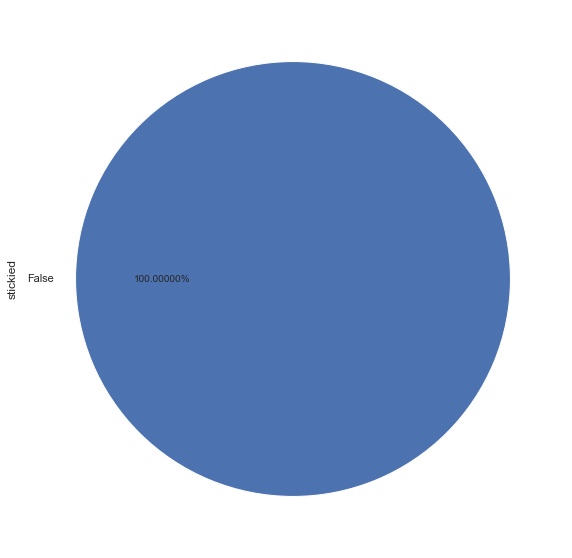

In [97]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [98]:
df["stickied"].unique()

array([False, nan], dtype=object)

In [99]:
df[df['stickied'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
I will try to talk him (again). It's definitely something that bothers me more than I'm dealing with. Thank you.,False,False,NaN,NaN,NaN,NaN,0.0,1636577073,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
. it is like setting outside but not completely. I hope someone here can explain it better than me because my English is not so good.,True,False,NaN,NaN,NaN,NaN,0.0,1637100065,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Lösche alle Zeilen, bei denen 'stickied' NaN ist
df = df.dropna(subset=['stickied'])

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, bei denen 'stickied' NaN ist


In [101]:
df['stickied'] = df['stickied'].replace(False, "0")

In [102]:
df[df['stickied'].isna()] 

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


In [103]:
df["stickied"].unique()

array(['0'], dtype=object)

0    150818
Name: stickied, dtype: int64


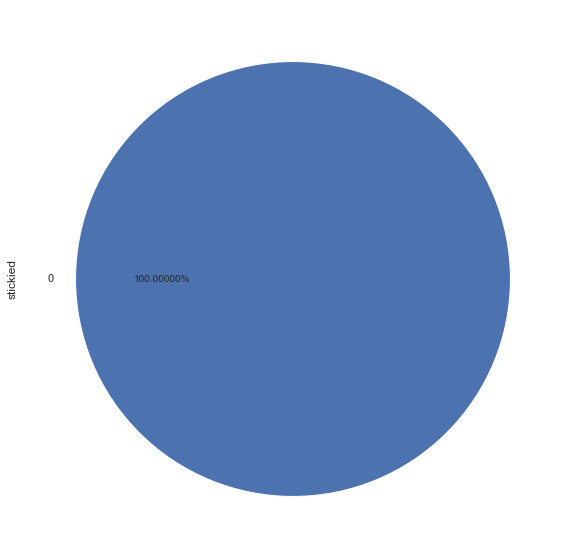

In [104]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# link_id

t3_r2ukiw    1098
t3_qtm7tz     822
t3_qun3z4     731
t3_r0o1jh     613
t3_r1wax6     558
             ... 
t3_qte3oa       1
t3_qte75r       1
t3_qte89s       1
t3_qtdf6a       1
t3_r615jj       1
Name: link_id, Length: 16780, dtype: int64


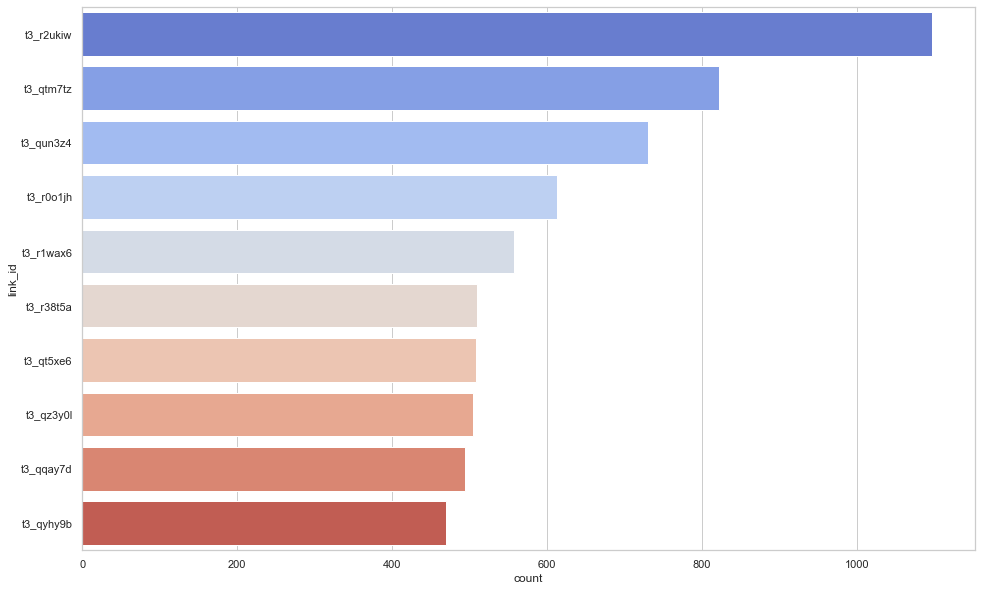

In [105]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [106]:
df[df['link_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


# Subreddit_id

t5_2qjvn    150818
Name: subreddit_id, dtype: int64


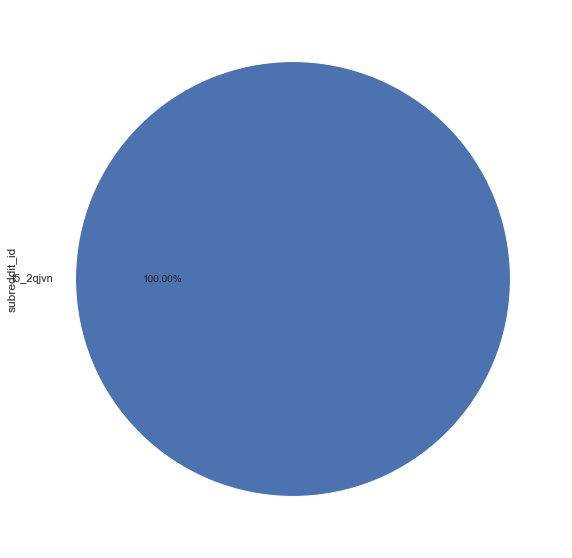

In [107]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

# Author

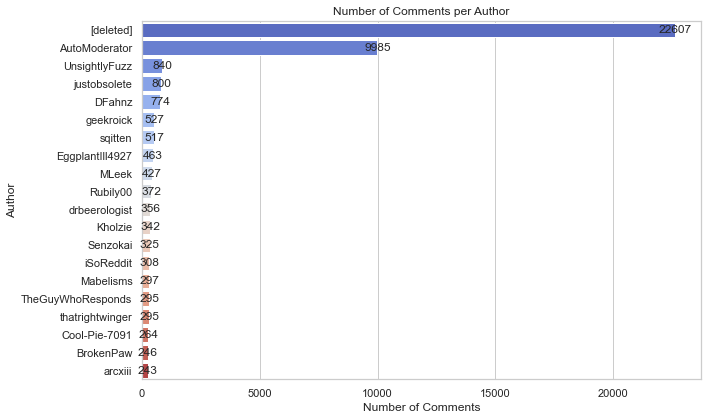

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [109]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable
3,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
20,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
26,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
28,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
103,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150712,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150725,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150745,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN
150765,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,...,relationships,t5_2qjvn,r/relationships,public,NaN,0.0,[],NaN,NaN,NaN


# Alle AutoModeratoren löschen

In [110]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

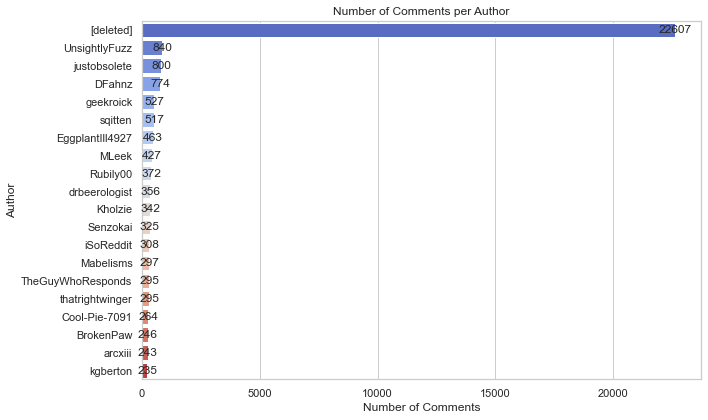

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [112]:
df['author_flair_text'].fillna('0', inplace=True)

0    140833
Name: author_flair_text, dtype: int64


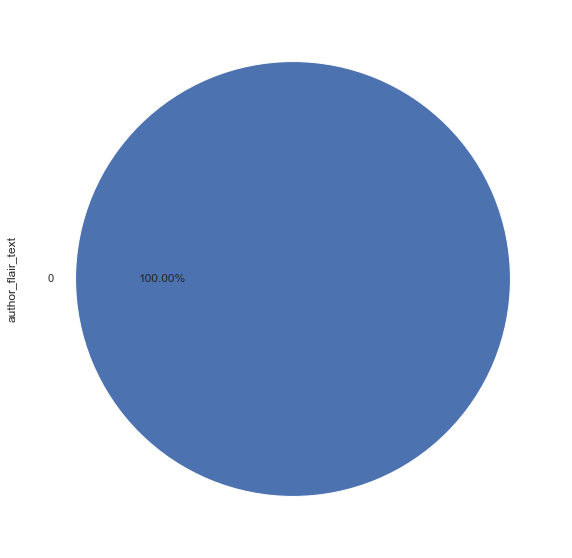

In [113]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    140833
Name: subreddit, dtype: int64


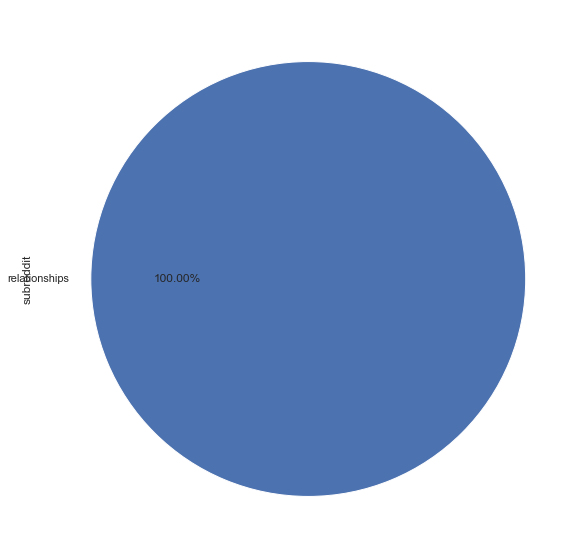

In [114]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [115]:
df[df['subreddit'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


# Created_utc

In [116]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [117]:
df['created_utc']

0        2021-11-01 00:00:05
1        2021-11-01 00:00:45
2        2021-11-01 00:00:49
4        2021-11-01 00:01:07
5        2021-11-01 00:01:57
                 ...        
150814   2021-11-30 23:58:59
150815   2021-11-30 23:59:03
150816   2021-11-30 23:59:11
150818   2021-11-30 23:59:50
150819   2021-11-30 23:59:54
Name: created_utc, Length: 140833, dtype: datetime64[ns]

In [118]:
df[df['created_utc'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

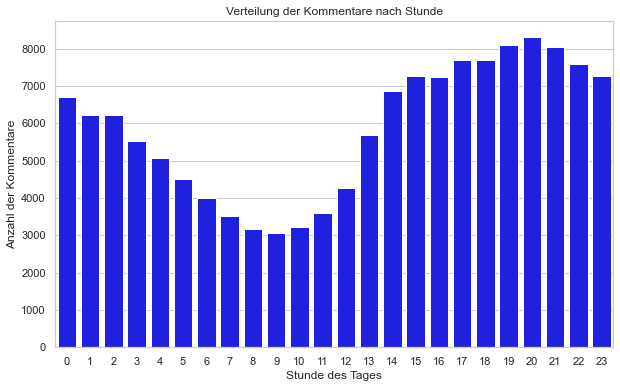

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

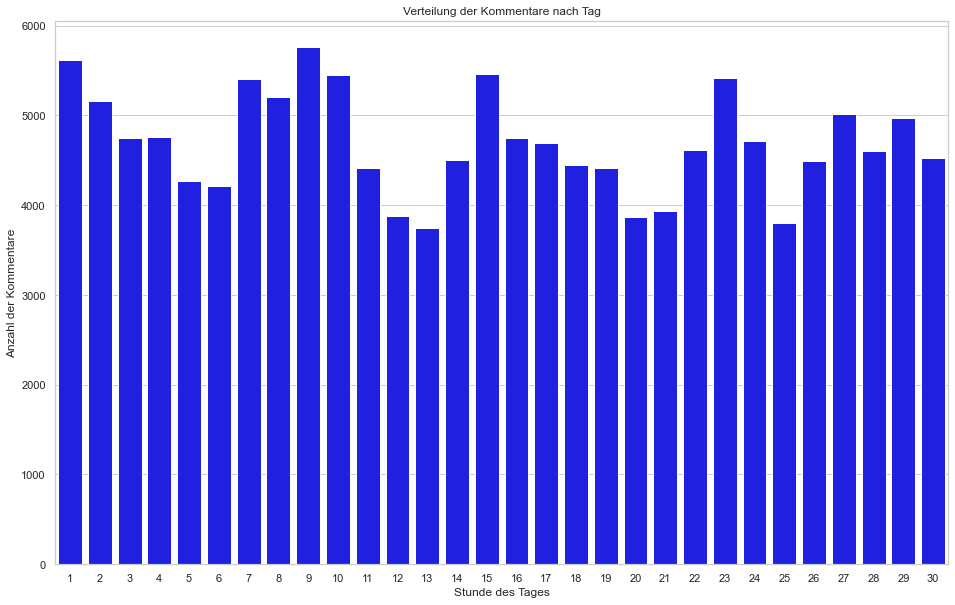

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Years

In [121]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [122]:
df['created_year'].unique()

array([2021])

In [123]:
 df[pd.isna(df['created_day'])]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Gilded

0    110275
0     30485
1        57
1        10
2         2
2         2
3         1
3         1
Name: gilded, dtype: int64


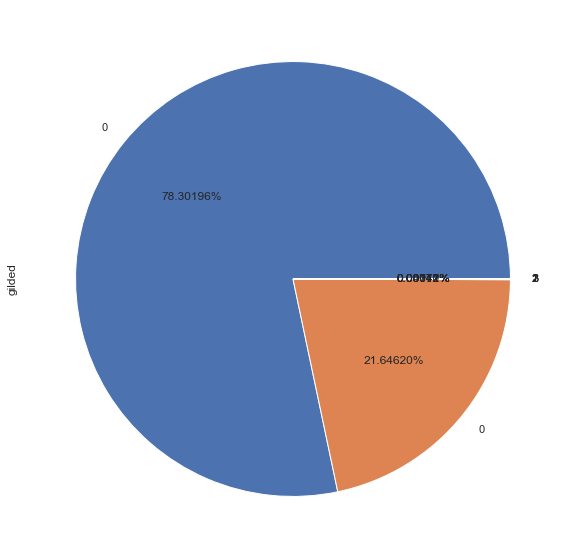

In [124]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [125]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")
df['gilded'] = df['gilded'].replace(2,"2")
df['gilded'] = df['gilded'].replace(3,"3")

0    140760
1        67
2         4
3         2
Name: gilded, dtype: int64


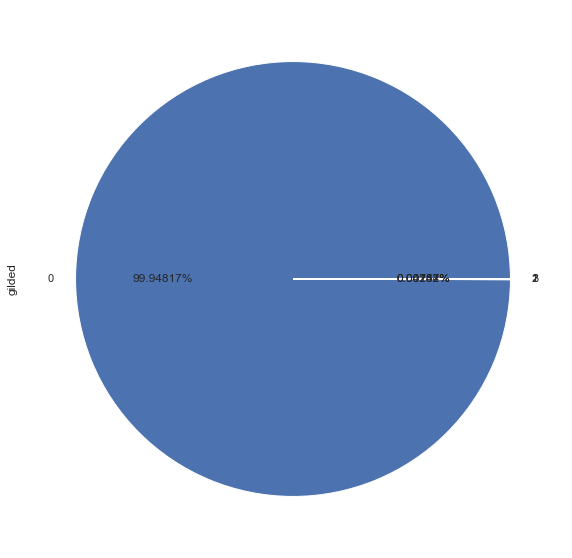

In [126]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [127]:
df["gilded"].unique()

array(['0', '1', '2', '3'], dtype=object)

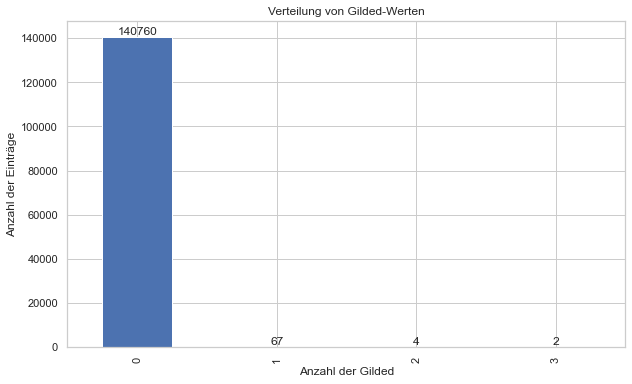

In [128]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [129]:
df['distinguished'].fillna('0', inplace=True)

0    140833
Name: distinguished, dtype: int64


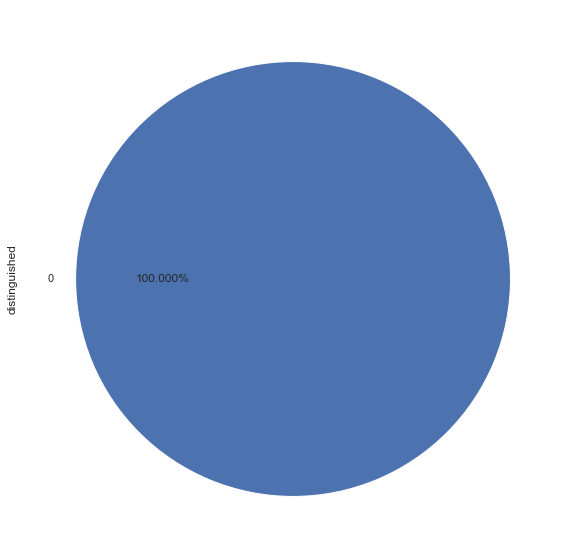

In [130]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [131]:
df["distinguished"].unique()

array(['0'], dtype=object)

# Edited

In [132]:
df["edited"].unique()

array(['False', '1635726560.0', '1635727183.0', ..., '1638316477.0',
       '1638320780.0', '1638321093.0'], dtype=object)

In [133]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111.1', "1")
df['edited'] = df['edited'].replace('False', "0")

In [135]:
df['edited'] = df['edited'].replace('1111111111.1', "1")

0    135673
1      5160
Name: edited, dtype: int64


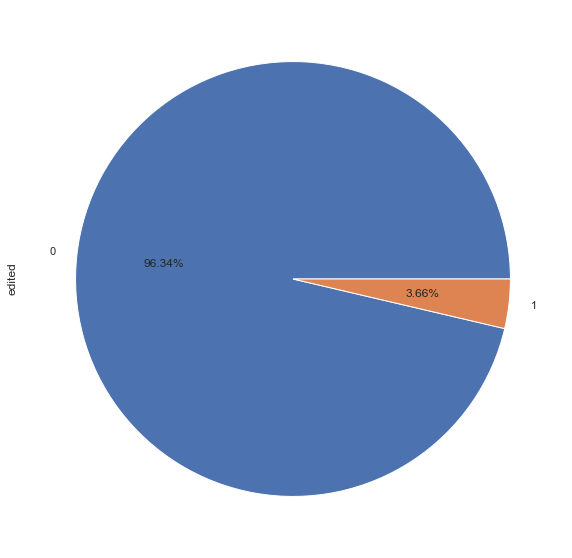

In [136]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [137]:
df[df['edited'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday,editable,created_hour,created_day,created_year


# Score

In [138]:
df["score"].value_counts()

1.0       46542
2.0       20199
3.0       11793
0.0        6756
4.0        5600
          ...  
396.0         1
510.0         1
1634.0        1
2613.0        1
638.0         1
Name: score, Length: 916, dtype: int64

In [139]:
df['score'] = df["score"].astype(int)

In [140]:
df["score"].mean()

12.554294803064623

In [141]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   140833
author                                  0
author_created_utc                  22824
author_flair_background_color      140833
author_flair_css_class             140833
author_flair_richtext               22607
author_flair_template_id           140833
author_flair_text                       0
author_flair_text_color            118226
author_flair_type                   22607
author_fullname                     22607
author_patreon_flair                22607
author_premium                      22607
body                                    0
can_gild                                0
collapsed                               0
collapsed_because_crowd_control    140833
collapsed_reason                   138653
collapsed_reason_code              120039
comment_type                       140833
controversiality                        0
created_utc                       

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140833 entries, 0 to 150819
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    140833 non-null  object        
 1   archived                         140833 non-null  bool          
 2   associated_award                 0 non-null       float64       
 3   author                           140833 non-null  object        
 4   author_created_utc               118009 non-null  float64       
 5   author_flair_background_color    0 non-null       float64       
 6   author_flair_css_class           0 non-null       float64       
 7   author_flair_richtext            118226 non-null  object        
 8   author_flair_template_id         0 non-null       float64       
 9   author_flair_text                140833 non-null  object        
 10  author_flair_text_color          22607 non-null  

# Two Feature Analyses

# Hours vs Score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

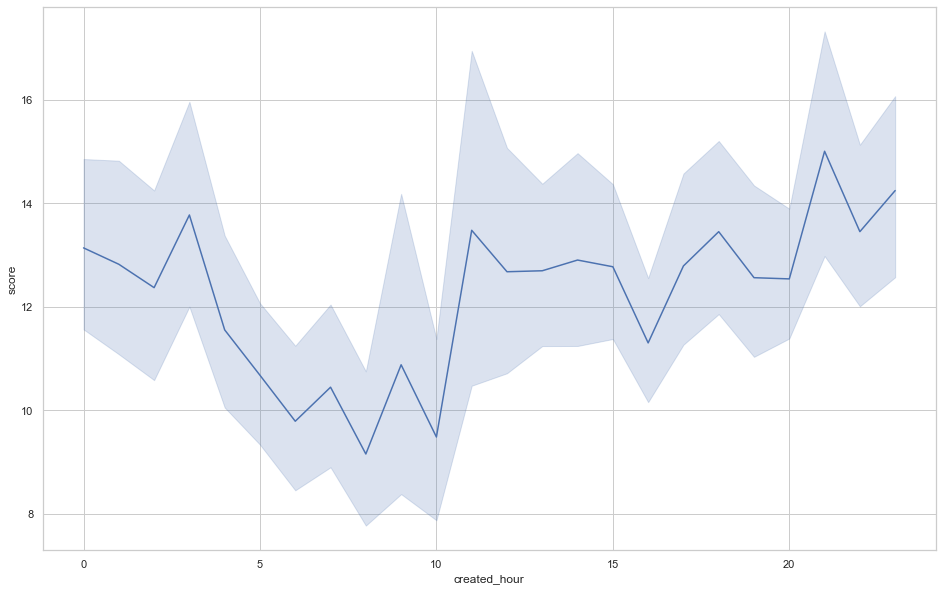

In [144]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

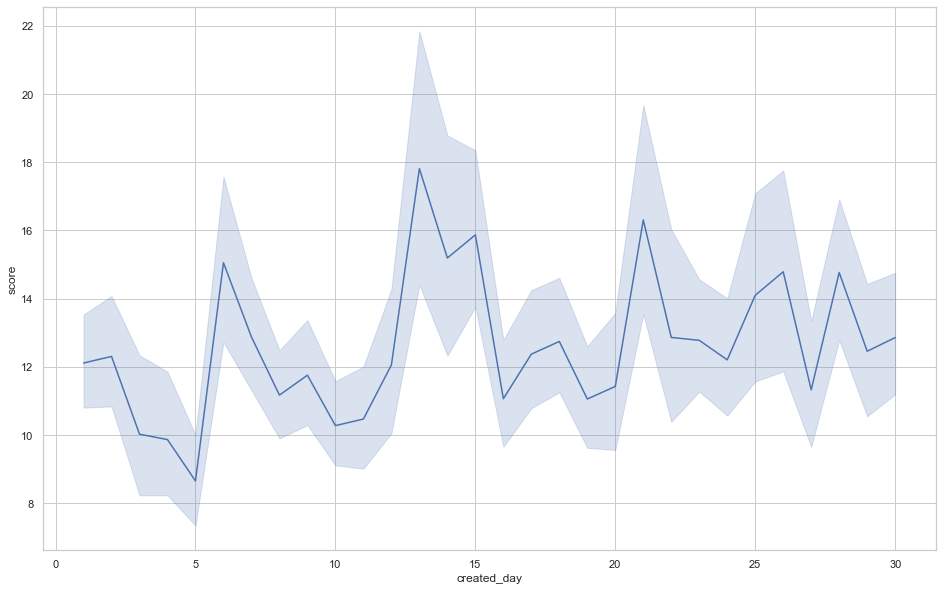

In [145]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

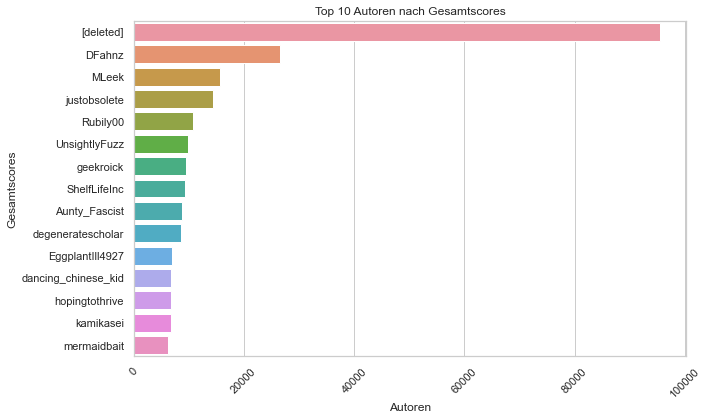

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

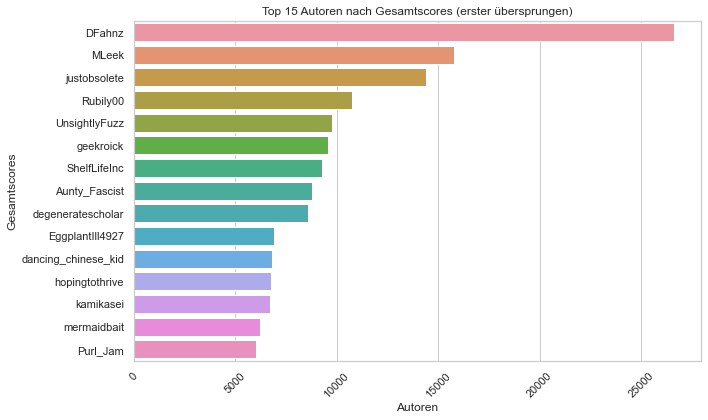

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_cakeday', 'editable',
       'created_ho

# Column removing

In [149]:
df=df.drop(["author_created_utc","author_flair_richtext","author_flair_template_id","author_flair_text_color","author_flair_type","author_fullname","author_patreon_flair","can_gild","gildings","is_submitter","no_follow","subreddit_name_prefixed","author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [152]:
df=df.drop(["author_flair_background_color","author_flair_text","collapsed","collapsed_reason","send_replies"], axis = 1)

In [155]:
df=df.drop(["all_awardings","associated_award","author_premium","collapsed_because_crowd_control","locked","total_awards_received"], axis = 1)

In [156]:
df.columns

Index(['archived', 'author', 'body', 'collapsed_reason_code', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'id', 'link_id', 'name', 'parent_id', 'score', 'score_hidden',
       'stickied', 'top_awarded_type', 'treatment_tags', 'unrepliable_reason',
       'editable', 'created_hour', 'created_day', 'created_year'],
      dtype='object')

In [157]:
df=df.drop(["archived","collapsed_reason_code","comment_type","top_awarded_type","treatment_tags","unrepliable_reason","editable"], axis = 1)

In [160]:
df=df.drop(["name","score_hidden"], axis = 1)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140833 entries, 0 to 150819
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            140833 non-null  object        
 1   body              140833 non-null  object        
 2   controversiality  140833 non-null  object        
 3   created_utc       140833 non-null  datetime64[ns]
 4   distinguished     140833 non-null  object        
 5   edited            140833 non-null  object        
 6   gilded            140833 non-null  object        
 7   id                140833 non-null  object        
 8   link_id           140833 non-null  object        
 9   parent_id         140833 non-null  object        
 10  score             140833 non-null  int64         
 11  stickied          140833 non-null  object        
 12  created_hour      140833 non-null  int64         
 13  created_day       140833 non-null  int64         
 14  created_y

# Row Deleting

# Delet all comments that have NA

In [162]:
df[pd.isna(df['body'])]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [163]:
df.isnull().sum() 

author              0
body                0
controversiality    0
created_utc         0
distinguished       0
edited              0
gilded              0
id                  0
link_id             0
parent_id           0
score               0
stickied            0
created_hour        0
created_day         0
created_year        0
dtype: int64

# Body analyses abnd Pre processing

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   10095
[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0, flags=flags)


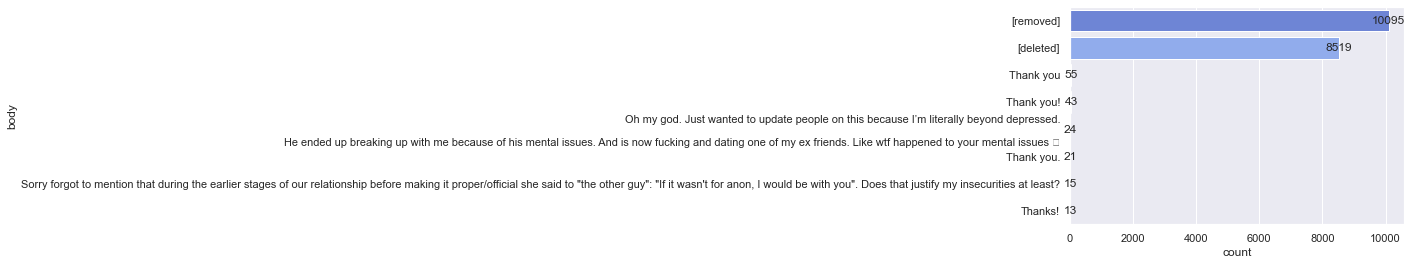

In [164]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [165]:
filtered_df=df[df['body'] == '[removed]']

In [166]:
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
30,[deleted],[removed],0,2021-11-01 00:08:11,0,0,0,hitsm1k,t3_qjk8bx,t3_qjk8bx,1,0,0,1,2021
47,[deleted],[removed],0,2021-11-01 00:12:57,0,0,0,hitt5k6,t3_qk228w,t3_qk228w,1,0,0,1,2021
58,[deleted],[removed],0,2021-11-01 00:16:48,0,0,0,hittlef,t3_qk1gpz,t1_hittgp6,1,0,0,1,2021
110,[deleted],[removed],0,2021-11-01 00:30:50,0,0,0,hitv7sz,t3_qjo9c9,t1_hir8kwp,1,0,0,1,2021
131,[deleted],[removed],0,2021-11-01 00:36:34,0,1,0,hitvwbt,t3_qk19jr,t1_hitss62,-5,0,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150718,[deleted],[removed],0,2021-11-30 23:43:05,0,0,0,hmq8evd,t3_r5zb6p,t1_hmq0d4t,-41,0,23,30,2021
150736,[deleted],[removed],0,2021-11-30 23:45:12,0,0,0,hmq8p7c,t3_r60lrb,t3_r60lrb,1,0,23,30,2021
150758,[deleted],[removed],0,2021-11-30 23:50:07,0,0,0,hmq9cvc,t3_r5qbs7,t1_hmq3sn3,1,0,23,30,2021
150763,[deleted],[removed],0,2021-11-30 23:50:30,0,0,0,hmq9eqy,t3_r57b5p,t1_hmpu84r,1,0,23,30,2021


In [167]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,10095.000000,10095.000000,10095.000000,10095.0
mean,2.182665,12.180287,15.340267,2021.0
std,15.045256,7.264484,8.699552,0.0
min,-191.000000,0.000000,1.000000,2021.0
25%,1.000000,5.000000,8.000000,2021.0
50%,1.000000,13.000000,15.000000,2021.0
75%,1.000000,19.000000,23.000000,2021.0
max,597.000000,23.000000,30.000000,2021.0


Text(0.5, 1.0, 'Histogramm der Scores')

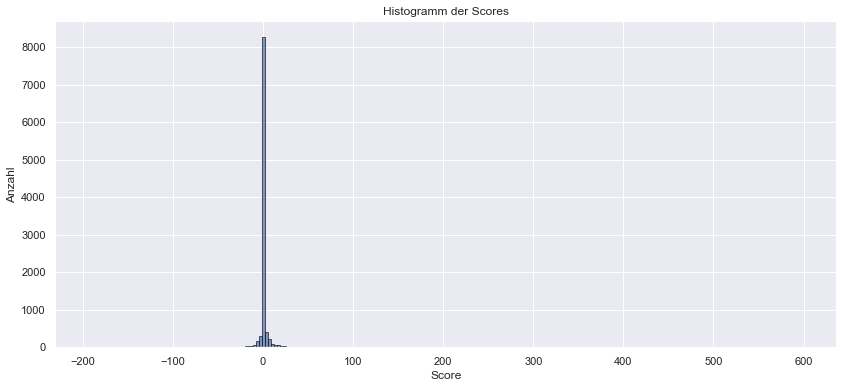

In [168]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

removed Kommentare löschen

In [169]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   8519
Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0, flags=flags)


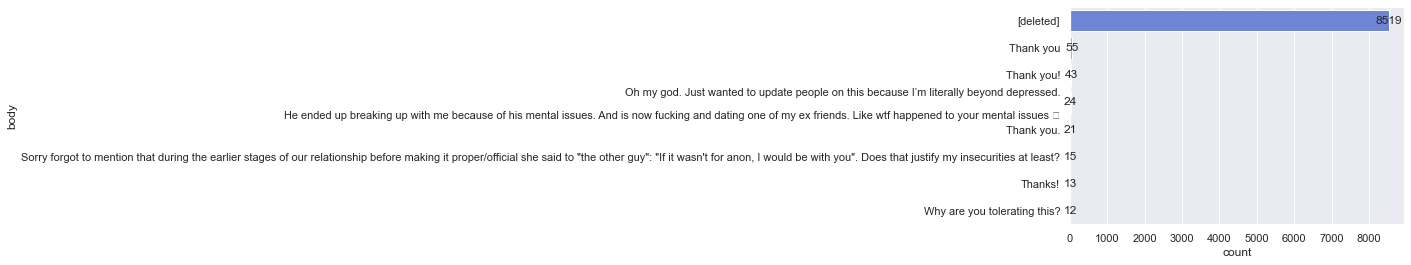

In [170]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [171]:
filtered_df_del=df[df['body'] == '[deleted]']

In [172]:
filtered_df_del

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1,[deleted],[deleted],0,2021-11-01 00:00:45,0,0,0,hitrr1r,t3_qk1gpz,t1_hitrd30,-3,0,0,1,2021
9,[deleted],[deleted],0,2021-11-01 00:02:23,0,0,0,hitrxoo,t3_qk00da,t3_qk00da,23,0,0,1,2021
10,[deleted],[deleted],0,2021-11-01 00:02:53,0,0,0,hitrzo2,t3_qjo9c9,t3_qjo9c9,-1,0,0,1,2021
14,[deleted],[deleted],0,2021-11-01 00:04:12,0,0,0,hits56t,t3_qk1gpz,t1_hitrx2p,-1,0,0,1,2021
23,[deleted],[deleted],0,2021-11-01 00:06:43,0,0,0,hitsfrs,t3_qk1hxt,t3_qk1hxt,-2,0,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150762,[deleted],[deleted],0,2021-11-30 23:50:29,0,0,0,hmq9epu,t3_r60vxs,t1_hmq94i9,-2,0,23,30,2021
150781,[deleted],[deleted],0,2021-11-30 23:53:16,0,0,0,hmq9sdj,t3_r60vxs,t1_hmq9jje,0,0,23,30,2021
150790,[deleted],[deleted],0,2021-11-30 23:54:34,0,0,0,hmq9yo3,t3_r60vxs,t1_hmq9t7c,1,0,23,30,2021
150800,[deleted],[deleted],0,2021-11-30 23:55:59,0,0,0,hmqa5k9,t3_r60vxs,t1_hmq9vec,-1,0,23,30,2021


In [173]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,8519.000000,8519.000000,8519.000000,8519.0
mean,4.704191,12.703721,15.019721,2021.0
std,32.206171,7.295721,8.807993,0.0
min,-194.000000,0.000000,1.000000,2021.0
25%,1.000000,6.000000,7.000000,2021.0
50%,1.000000,14.000000,15.000000,2021.0
75%,2.000000,19.000000,23.000000,2021.0
max,1476.000000,23.000000,30.000000,2021.0


In [174]:
len(filtered_df_del)

8519

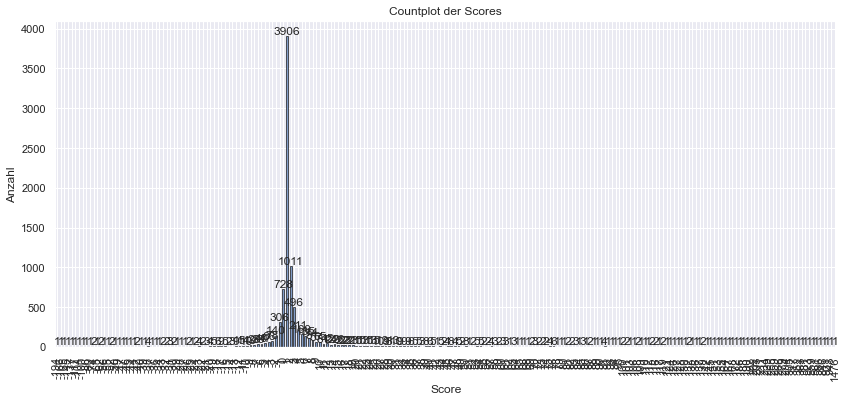

In [175]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [176]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   55
Thank you!                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0, flags=flags)


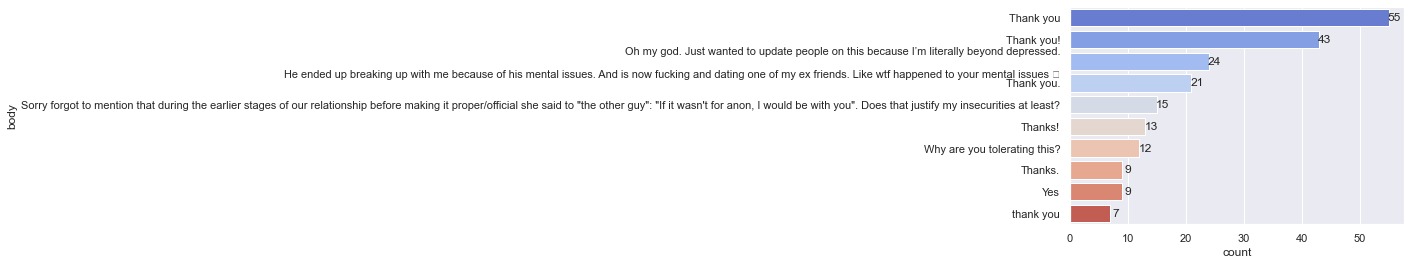

In [180]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:10].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [181]:
df = df[df['body'] != '.']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   55
Thank you!                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128528 missing from current font.
  font.set_text(s, 0, flags=flags)


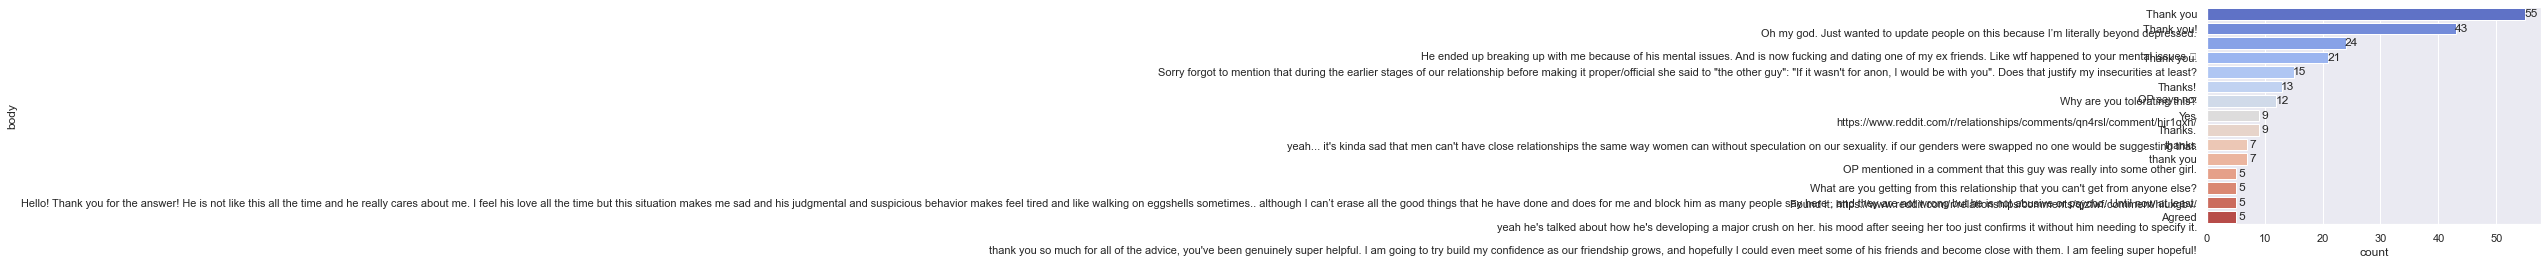

In [182]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:15].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und Redditnames removen

# Löschen aller Authoren die AutoModerator sind

In [183]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames removen

In [184]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [185]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [186]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
69552,StrawberryBlondeHaze,r/estrangedadultchild,0,2021-11-14 16:56:57,0,0,0,hklu47w,t3_qtkz7r,t3_qtkz7r,2,0,16,14,2021


In [187]:
df = df.drop(selected_sub_men_two.index)

In [188]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [189]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [190]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5700,AlwaysShitComments,https://youtu.be/4m1EFMoRFvY,0,2021-11-01 23:08:42,0,0,0,hiy0chr,t3_qkp5ta,t3_qkp5ta,1,0,23,1,2021
25768,Adorable_Bench_6947,https://t.me/angiecorineof,0,2021-11-05 20:56:25,0,0,0,hjgruf1,t3_qn4rsl,t3_qn4rsl,1,0,20,5,2021
100810,foxfighter107,https://youtu.be/-DN5r0jTA2w,0,2021-11-20 21:18:38,0,0,0,hlfj3rc,t3_qyattn,t1_hlfi0kz,4,0,21,20,2021


In [191]:
df = df.drop(selected_rows_2.index)

In [192]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
62858,mermaidbait,https://www.reddit.com/r/relationships/comment...,0,2021-11-12 23:58:40,0,0,0,hkeb610,t3_qsmdl1,t1_hke0394,2,0,23,12,2021
104182,legsylexi,https://www.reddit.com/r/relationships/comment...,0,2021-11-21 17:23:21,0,0,0,hlj4pvw,t3_qysyaj,t1_hlj4iio,1,0,17,21,2021


In [193]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [194]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows 

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [196]:
#Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Lösche Zeilen, in denen die Spalte 'body' mit 'Helper bot' beginnt
df = df[~df['body'].str.startswith('Helper bot')]

In [197]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_1412/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
20605,earnestadmission,Probably a bot trying to build a comment histo...,0,2021-11-04 19:51:26,0,0,0,hjbo4p1,t3_qmjkkj,t1_hjbgw0z,7,0,19,4,2021
25787,Kiredis,Ah I thought you were a bot!! I can totally he...,0,2021-11-05 21:02:08,0,0,0,hjgsqqi,t3_qnkenx,t1_hjgsj87,1,0,21,5,2021
40491,TheDroidNextDoor,##This Is The Way Leaderboard \n\n**1.** `u/F...,0,2021-11-08 18:44:24,0,0,0,hju31jv,t3_qpipqa,t1_hju30hg,-1,0,18,8,2021
42736,CorpusClock,My friend was like this about her cat. She'd s...,0,2021-11-09 02:14:26,0,0,0,hjvuwcz,t3_qps8p7,t3_qps8p7,10,0,2,9,2021
56358,moanchompsky,"If what you want is advice, then I will tell y...",0,2021-11-11 14:39:05,0,0,0,hk7g0eg,t3_qrj346,t3_qrj346,1,0,14,11,2021
64802,rockinn_robinn,Well you don’t sound like some weirdo creep bot.,0,2021-11-13 14:54:36,0,0,0,hkgn5lo,t3_qsp0qd,t1_hkfop3l,1,0,14,13,2021
97054,kelvin_bot,"-17°F is equivalent to -27°C, which is 245K.\n...",0,2021-11-19 23:11:23,0,0,0,hlbhv0p,t3_qxotkp,t1_hlbhu09,5,0,23,19,2021
108898,NotMyUsualAccount627,This is a spam post. A different person posted...,0,2021-11-22 16:17:41,0,0,0,hlnik42,t3_qznmbj,t3_qznmbj,1,0,16,22,2021
111218,DesperateEffect,This is definitely a bot you responded too\n\n...,1,2021-11-23 02:48:19,0,0,0,hlpzhue,t3_r00s7t,t1_hlprq4m,3,0,2,23,2021
113714,hip_drive,This is a copy-paste of someone else’s post. Y...,0,2021-11-23 16:23:43,0,1,0,hls7flz,t3_r0gcon,t3_r0gcon,3,0,16,23,2021


In [201]:
len(bot_in_body_rows)

19

In [219]:
indices_to_remove = bot_in_body_rows.iloc[[2, 6]].index
df = df.drop(indices_to_remove)

In [221]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
len(bot_in_body_rows)

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_1412/2205268755.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


17

In [225]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
59772,HelloRedditAreYouOk,I read something about interacting with social...,0,2021-11-12 05:49:09,0,0,0,hkauup7,t3_qrkq88,t3_qrkq88,1,0,5,12,2021
59775,HelloRedditAreYouOk,I read something about interacting with social...,0,2021-11-12 05:49:34,0,0,0,hkauw8x,t3_qrkq88,t3_qrkq88,1,0,5,12,2021
59776,HelloRedditAreYouOk,I read something about interacting with social...,0,2021-11-12 05:50:22,0,0,0,hkauz16,t3_qrkq88,t3_qrkq88,1,0,5,12,2021


In [226]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
61391,Admirable_Share_5843,Tell them to bleep off and mind the own busine...,0,2021-11-12 16:31:21,0,0,0,hkckrhu,t3_qsbpvy,t3_qsbpvy,1,0,16,12,2021


In [227]:
df[df['author'].str.contains("kelvin_bot", case=False, regex=True)]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [228]:
df_bot=pd.read_csv("bot_names.csv")

In [229]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [230]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)
df_check_bot

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
44,thefightforgood,Or alternatively leave this person be because ...,0,2021-11-01 00:12:04,0,0,0,hitt215,t3_qk180a,t1_hitnqyd,2,0,0,1,2021
64,gdubh,You have a responsibility to curb what’s going...,0,2021-11-01 00:19:16,0,0,0,hittvw7,t3_qjxlu7,t3_qjxlu7,4,0,0,1,2021
75,gdubh,"You just do it straight forward, candidly, wit...",0,2021-11-01 00:20:52,0,0,0,hitu2eu,t3_qjxlu7,t1_hit0479,1,0,0,1,2021
143,hotdogfluster,But you kind of are keeping a tally. You said ...,1,2021-11-01 00:43:01,0,0,0,hitwo41,t3_qk1gpz,t1_hitpkub,0,0,0,1,2021
212,nonradicalmaximalist,Some people get in to relationships because it...,0,2021-11-01 01:09:29,0,0,0,hitzrcx,t3_qjo9c9,t3_qjo9c9,1,0,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150392,Onequestion0110,You don't really need to do it in a public pla...,0,2021-11-30 22:01:26,0,0,0,hmpu2rt,t3_r5oop6,t1_hmo32mm,7,0,22,30,2021
150462,Burton_MagicHead_Gus,I feel like that got aggressive and went from ...,0,2021-11-30 22:20:56,0,0,0,hmpwwow,t3_r5vhyt,t1_hmptx3d,1,0,22,30,2021
150473,Burton_MagicHead_Gus,How about I put it this way: she’s “done the h...,0,2021-11-30 22:24:50,0,0,0,hmpxh4s,t3_r5vhyt,t1_hmpws0o,0,0,22,30,2021
150645,goatismycopilot,Did you grow up in a verbally abusive househol...,0,2021-11-30 23:21:45,0,0,0,hmq5iiy,t3_r5zouj,t3_r5zouj,11,0,23,30,2021


In [231]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
24816,FeliciaaFancybottomm,That’s concerning especially since he’s 25. It...,0,2021-11-05 17:30:32,0,0,0,hjfv5as,t3_qng32z,t3_qng32z,6,0,17,5,2021
34762,thebottomofawhale,Nah. He is definitely toxic. \n\nConstantly pu...,0,2021-11-07 18:14:42,0,0,0,hjpam7t,t3_qog6nz,t1_hjn12j0,1,0,18,7,2021
37832,most_likely_not_abot,lol. not safe for you comments below.\n\nThis...,1,2021-11-08 05:48:34,0,0,0,hjruiqe,t3_qp5vo0,t3_qp5vo0,1,0,5,8,2021
41318,alphabet_order_bot,"Would you look at that, all of the words in yo...",0,2021-11-08 21:31:29,0,0,0,hjus1q2,t3_qpgz0u,t1_hjus0mk,0,0,21,8,2021
78545,redditbot1098,"I’m sorry you dislike your body type, I get th...",0,2021-11-16 03:46:14,0,0,0,hkt7cnu,t3_quvpi5,t3_quvpi5,-5,0,3,16,2021
79134,alphabet_order_bot,"Would you look at that, all of the words in yo...",0,2021-11-16 06:25:48,0,0,0,hktoa4r,t3_qv1918,t1_hkto9gl,3,0,6,16,2021
85036,bot_bot_bot,That's standard policy in most companies too I...,0,2021-11-17 14:45:49,0,0,0,hkzqkw2,t3_qvdx0n,t1_hkxn7aq,3,0,14,17,2021
106924,bot_bot_bot,"Yeah, those parents who were cheated on are as...",0,2021-11-22 06:02:52,0,0,0,hllxnds,t3_qz3y0l,t1_hllwg6m,40,0,6,22,2021
107069,bot_bot_bot,Life doesn't work that way buddy.,0,2021-11-22 06:52:15,0,0,0,hlm1w6n,t3_qz3y0l,t1_hlm0xtf,9,0,6,22,2021
107206,bot_bot_bot,"I'm very happy for you, but you can do everyth...",1,2021-11-22 07:35:08,0,0,0,hlm5b4f,t3_qz3y0l,t1_hlm40n3,0,0,7,22,2021


In [248]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[10]["body"]

"And that's perfectly reasonable. I'm just saying that there are things outside ones control that can influence the situation in ways that are detrimental to your kids no matter what your well laid plans are.  \nSuppose one partner has a substance abuse problem, but the courts don't see it and give custody 50/50 anyway. You gonna let your kid stay 100%  at your ex's house?"

In [250]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Filtern Sie die Zeilen, die "author" den Wert "alphabet_order_bot" (unabhängig von der Groß- und Kleinschreibung) enthalten
rows_to_remove = df[df['author'].str.contains("alphabet_order_bot", case=False, regex=True)]

# Löschen Sie die ausgewählten Zeilen aus dem DataFrame
df = df.drop(rows_to_remove.index)

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen "author" den Wert "alphabet_order_bot" enthält


In [251]:
df_check_bot[df_check_bot['body'].str.contains('bleep')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [252]:
df_check_bot[df_check_bot['body'].str.contains('bloop')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [256]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
8637,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-02 13:31:55,0,0,0,hj0c8ul,t3_ql2ycm,t1_hj0c7zg,1,0,13,2,2021
15066,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-03 19:16:41,0,0,0,hj6qdy7,t3_qlkwdj,t1_hj6qcxf,1,0,19,3,2021
51700,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-10 16:22:17,0,0,0,hk31661,t3_qqlk1b,t1_hk3155u,2,0,16,10,2021
54239,AutoBot5,Read it the same way.,0,2021-11-11 00:59:40,0,0,0,hk56gvu,t3_qr8e6x,t1_hk53rex,3,0,0,11,2021
70304,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-14 19:15:41,0,0,0,hkmfrz5,t3_qtm7tz,t1_hkmfqwo,2,0,19,14,2021
76793,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-15 21:33:44,0,0,0,hkrs09u,t3_qun3z4,t1_hkrrzbe,2,0,21,15,2021
86841,LuckyNumber-Bot,All the numbers in your comment added up to 69...,0,2021-11-17 20:43:53,0,0,0,hl18h58,t3_qw65b3,t1_hl18g6i,1,0,20,17,2021
89258,CallMeABot,"The first thing that caught my eyes, was the b...",0,2021-11-18 10:17:39,0,0,0,hl3s0gu,t3_qwifrx,t3_qwifrx,25,0,10,18,2021
94465,CallMeABot,"First off all, I would recommend that you tell...",0,2021-11-19 12:52:45,0,0,0,hl8z5dl,t3_qxedt2,t3_qxedt2,21,0,12,19,2021
114670,WaterIsWetBot,Water is actually not wet; It makes other mate...,0,2021-11-23 19:03:14,0,0,0,hlsw4h6,t3_r0fkfv,t1_hlsw1hf,1,0,19,23,2021


In [267]:
df_check_bot[df_check_bot['author'].str.contains('Bot')].iloc[8]["body"]

"First off all, I would recommend that you tell him that:\n\n&gt;So the issue I have is that he wants me to open up and lean on him more, and I don't want to be a burden or constantly complain about my life. \n\nSay that is hard to explain why. Say that you are still working on it and that it isn't easy to conquer the feeling. Especially if it's someone really close and important. You need to tell him, that it's really hard. \n\nI struggle with something similar and fortunately for me, those close to me understood and searched for a way to make it easier to communicate. Like codewords or special actions that only special people know. A secret sign more or less. \n\nYou could do the same. If it's hard to show your love verbally, look for a way to show it physically. Your own secret sign. It will be awkward at first, but it helps. Find something that makes you both comfortable and feel loved. If you have a bad day for example and don't want to think about it, ask him for cat videos. That

In [258]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ['LuckyNumber-Bot', 'CallMeABot', 'WaterIsWetBot']

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben


# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("relationship_21_comments_EDA_clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122196 entries, 0 to 122195
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            122196 non-null  object
 1   body              122196 non-null  object
 2   controversiality  122196 non-null  int64 
 3   created_utc       122196 non-null  object
 4   distinguished     122196 non-null  int64 
 5   edited            122196 non-null  int64 
 6   gilded            122196 non-null  int64 
 7   id                122196 non-null  object
 8   link_id           122196 non-null  object
 9   parent_id         122196 non-null  object
 10  score             122196 non-null  int64 
 11  stickied          122196 non-null  int64 
 12  created_hour      122196 non-null  int64 
 13  created_day       122196 non-null  int64 
 14  created_year      122196 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 14.0+ MB


In [4]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       This is easy. Are you ready to listen? Here's ...   
1       Communicating needs isn't begging unless you'r...   
2       Just be yourself and find somebody who accepts...   
3       She’s checked out. Probably already planning a...   
4       Stop worrying about your "cred" and take a sta...   
...                                                   ...   
122191  He’s trying to help himself and your relations...   
122192  it’s funny cause I actually got her off about ...   
122193  It's ok. It's not for you. But I definitively ...   
122194  My IL are Mum and Dad. I did not had much oppo...   
122195  It gets easier the more you get out of the inf...   

                                               clean_text  
0       This is easy . Are you ready to listen Here s ...  
1       Communicating needs isn t begging unless you r...  
2       Just be yourself and find somebody who accepts...  
3       She s checked out .

In [6]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [7]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
27020,sweatyrodger234,:(,0,2021-11-07 13:44:41,0,0,0,hjo7n4i,t3_qoo65c,t1_hjo7lvl,-2,0,13,7,2021,,0
34400,-yasssss-,,0,2021-11-09 00:56:32,0,0,0,hjvkkx7,t3_qpnxw9,t1_hjvgzk3,3,0,0,9,2021,,0
39514,uuuuuuuugh1,,0,2021-11-10 01:47:38,0,0,0,hk0jbkm,t3_qqhdtl,t1_hk098k7,2,0,1,10,2021,,0
39947,sky930,20,0,2021-11-10 03:30:52,0,0,0,hk0wx4r,t3_qqkk2q,t1_hk0wip4,2,0,3,10,2021,,0
50129,SortOfAnonymous3,:(,0,2021-11-12 18:02:33,0,0,0,hkcyc8r,t3_qs7847,t1_hkcxi88,-1,0,18,12,2021,,0
50669,SortOfAnonymous3,:(,0,2021-11-12 21:34:27,0,0,0,hkds996,t3_qs7847,t1_hkda9ia,0,0,21,12,2021,,0
64660,MEPETAMINALS,?,0,2021-11-16 12:16:03,0,0,0,hkuf71x,t3_qug7aa,t1_hkt8hlm,1,0,12,16,2021,,0
84499,Wingfril,???,0,2021-11-21 17:55:27,0,0,0,hlj9eu7,t3_qz02c7,t3_qz02c7,1,0,17,21,2021,,0
86532,Ahoymaties1,,0,2021-11-22 04:43:13,0,0,0,hllpvg9,t3_qyt1sb,t3_qyt1sb,1,0,4,22,2021,,0
95454,rainyday_redditor,https://www.reddit.com/r/AmItheAsshole/commen...,0,2021-11-24 05:12:55,0,0,0,hlv67vx,t3_r0k4vm,t1_hluyb83,6,0,5,24,2021,,0


In [8]:
df = df[df['comment_len'] != 0]

# Final EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122184 entries, 0 to 122195
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            122184 non-null  object
 1   body              122184 non-null  object
 2   controversiality  122184 non-null  int64 
 3   created_utc       122184 non-null  object
 4   distinguished     122184 non-null  int64 
 5   edited            122184 non-null  int64 
 6   gilded            122184 non-null  int64 
 7   id                122184 non-null  object
 8   link_id           122184 non-null  object
 9   parent_id         122184 non-null  object
 10  score             122184 non-null  int64 
 11  stickied          122184 non-null  int64 
 12  created_hour      122184 non-null  int64 
 13  created_day       122184 non-null  int64 
 14  created_year      122184 non-null  int64 
 15  clean_text        122184 non-null  object
 16  comment_len       122184 non-null  int

In [10]:
df.describe()

,controversiality,distinguished,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,122184.000000,122184.0,122184.000000,122184.000000,122184.000000,122184.0,122184.000000,122184.000000,122184.0,122184.000000
mean,0.034399,0.0,0.031444,0.000663,13.961362,0.0,12.752562,15.234867,2021.0,72.962908
std,0.182252,0.0,0.174516,0.028744,75.999052,0.0,7.292497,8.760482,0.0,81.731227
min,0.000000,0.0,0.000000,0.000000,-406.000000,0.0,0.000000,1.000000,2021.0,1.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.0,6.000000,8.000000,2021.0,23.000000
50%,0.000000,0.0,0.000000,0.000000,2.000000,0.0,14.000000,15.000000,2021.0,47.000000
75%,0.000000,0.0,0.000000,0.000000,7.000000,0.0,19.000000,23.000000,2021.0,93.000000
max,1.000000,0.0,1.000000,3.000000,4324.000000,0.0,23.000000,30.000000,2021.0,1638.000000


In [12]:
df.head()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,Admirable_Share_5843,This is easy. Are you ready to listen? Here's ...,0,2021-11-01 00:00:05,0,0,0,hitrodj,t3_qjzhcq,t3_qjzhcq,10,0,0,1,2021,This is easy . Are you ready to listen Here s ...,168
1,dancing_chinese_kid,Communicating needs isn't begging unless you'r...,0,2021-11-01 00:00:49,0,0,0,hitrrat,t3_qk1gpz,t1_hitr8oy,8,0,0,1,2021,Communicating needs isn t begging unless you r...,29
2,excodaIT,Just be yourself and find somebody who accepts...,0,2021-11-01 00:01:07,0,0,0,hitrsjt,t3_qk1e2y,t3_qk1e2y,1,0,0,1,2021,Just be yourself and find somebody who accepts...,70
3,Dangerous_187,She’s checked out. Probably already planning a...,0,2021-11-01 00:01:57,0,0,0,hitrvww,t3_qjo9c9,t3_qjo9c9,0,0,0,1,2021,She s checked out . Probably already planning ...,34
4,echosiah,"Stop worrying about your ""cred"" and take a sta...",0,2021-11-01 00:02:05,0,0,0,hitrwgc,t3_qjxlu7,t3_qjxlu7,1,0,0,1,2021,Stop worrying about your cred and take a stand...,69


In [13]:
df.tail()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
122191,longhorsewang,He’s trying to help himself and your relations...,0,2021-11-30 23:58:59,0,0,0,hmqak03,t3_r5sfaz,t3_r5sfaz,5,0,23,30,2021,He s trying to help himself and your relations...,41
122192,Difficult_Buffalo327,it’s funny cause I actually got her off about ...,0,2021-11-30 23:59:03,0,0,0,hmqak8g,t3_r5987o,t1_hmqa8jl,2,0,23,30,2021,it s funny cause I actually got her off about ...,56
122193,Darknatio,It's ok. It's not for you. But I definitively ...,0,2021-11-30 23:59:11,0,0,0,hmqakvw,t3_r60vxs,t3_r60vxs,2,0,23,30,2021,It s ok . It s not for you . But I definitivel...,67
122194,bilbosdottir,My IL are Mum and Dad. I did not had much oppo...,0,2021-11-30 23:59:50,0,0,0,hmqao44,t3_r56dep,t1_hmodkpa,1,0,23,30,2021,My IL are Mum and Dad . I did not had much opp...,23
122195,wigglebuttbiscuits,It gets easier the more you get out of the inf...,0,2021-11-30 23:59:54,0,1,0,hmqaogn,t3_r60zv1,t3_r60zv1,29,0,23,30,2021,It gets easier the more you get out of the inf...,69


# Controversialty

In [14]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    117981
True       4203
Name: controversiality, dtype: int64


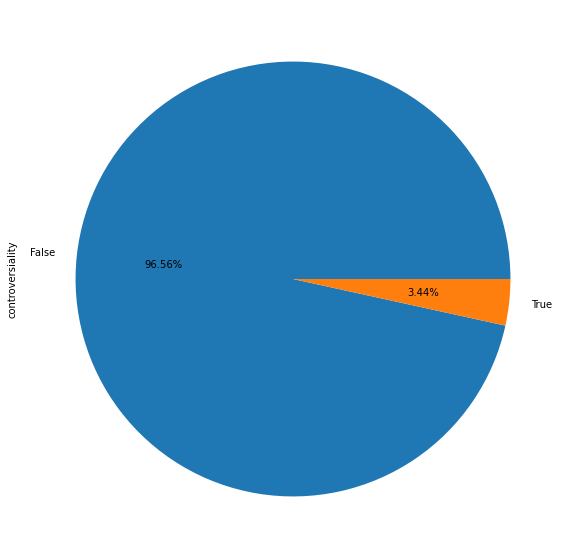

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [16]:
df['stickied'] = df['stickied'].replace(0,False)

False    122184
Name: stickied, dtype: int64


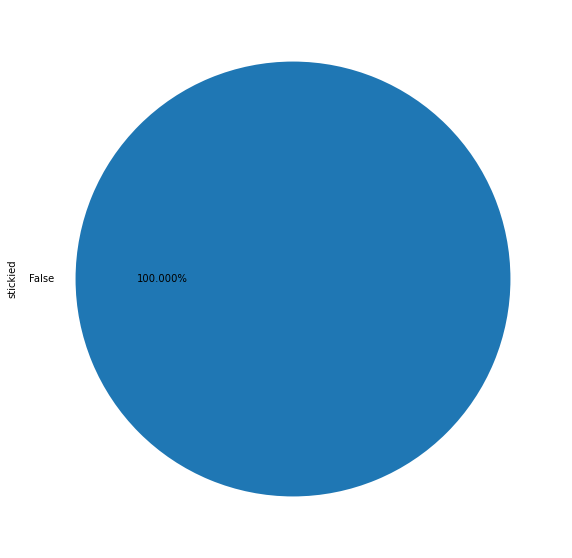

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# link_id

t3_r2ukiw    942
t3_qtm7tz    762
t3_qun3z4    663
t3_r0o1jh    557
t3_r1wax6    521
            ... 
t3_qvnr5e      1
t3_qnsnkg      1
t3_qvn7wl      1
t3_qnsp8a      1
t3_oc1au6      1
Name: link_id, Length: 6741, dtype: int64


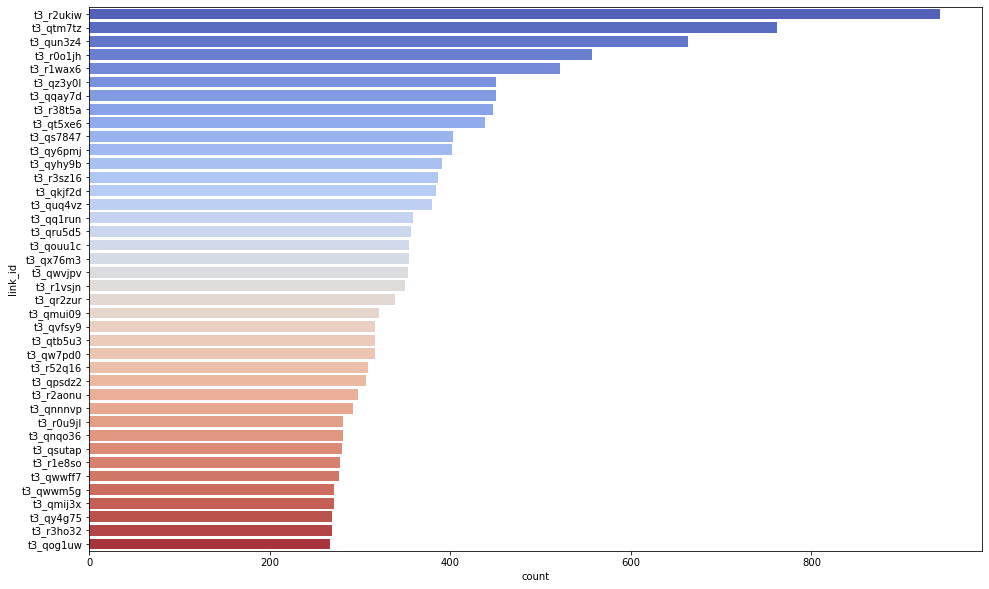

In [18]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [19]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 6741


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

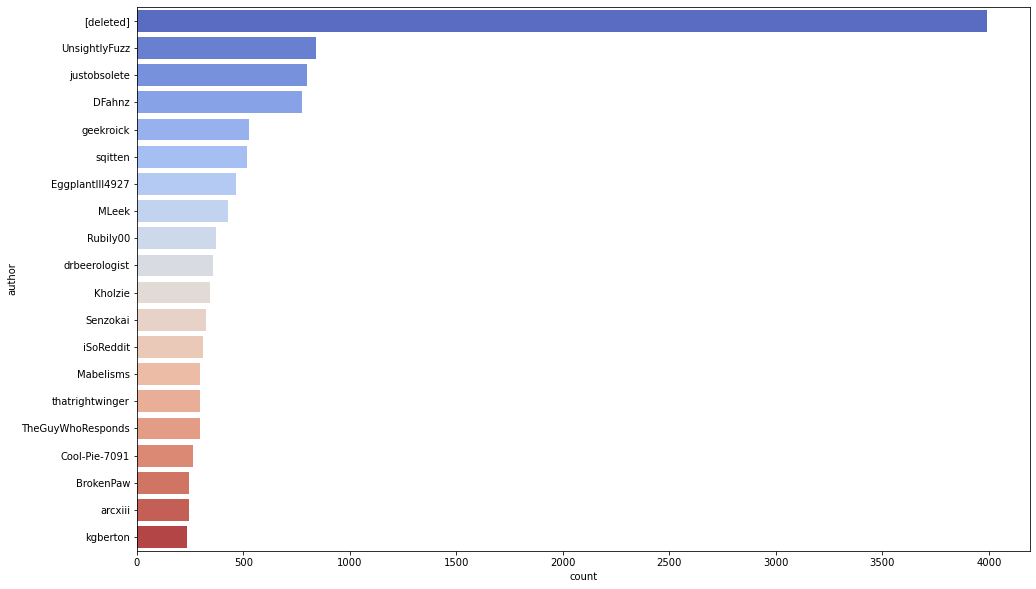

In [20]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

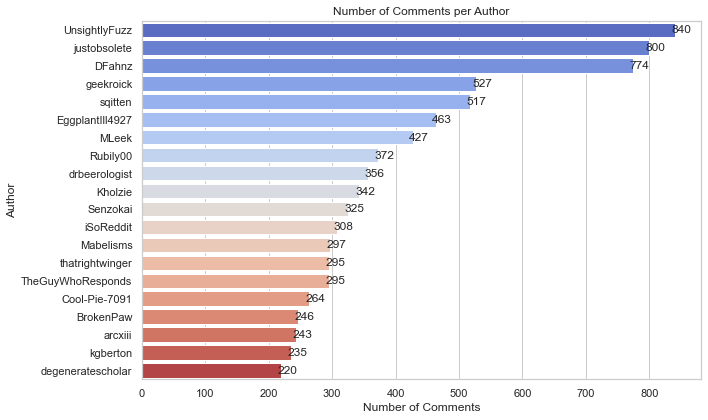

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [22]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 18.13


In [23]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.42


In [24]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 27615


# Hours

([<matplotlib.axis.XTick at 0x7fcecb163940>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

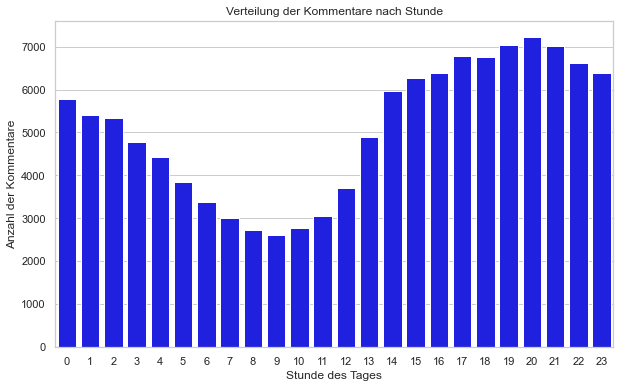

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

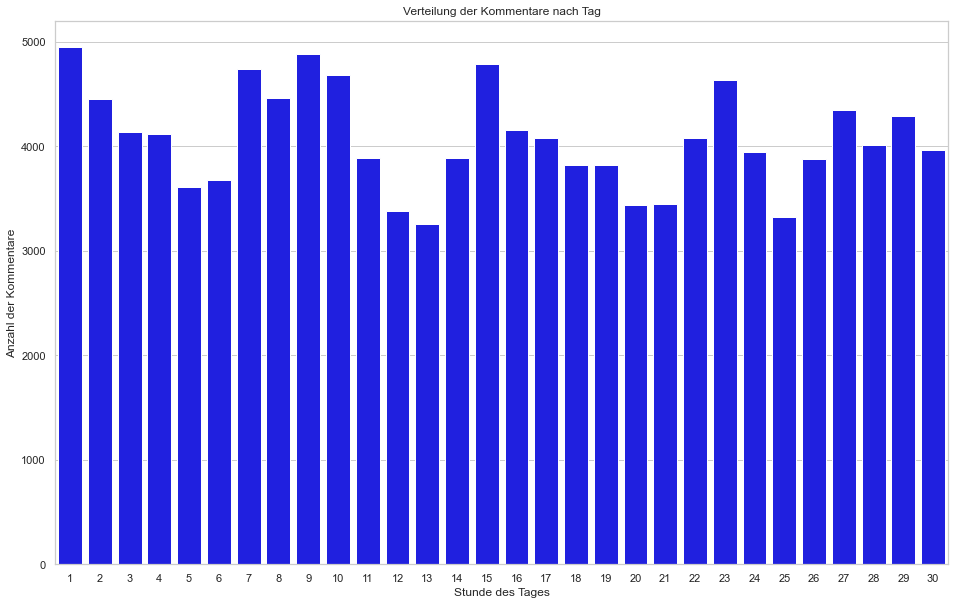

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    122111
1        67
2         4
3         2
Name: gilded, dtype: int64


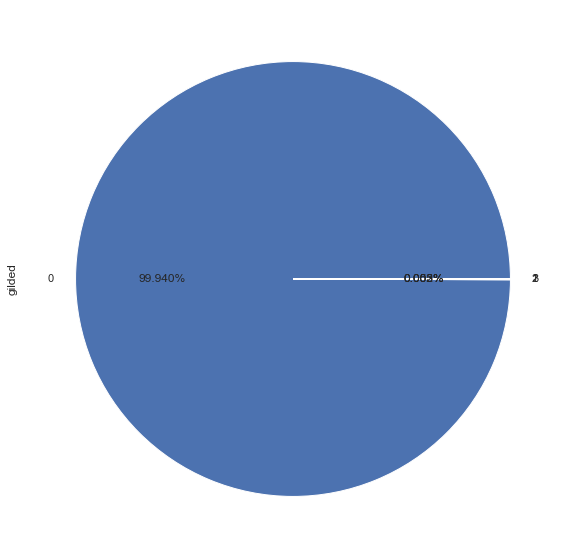

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguised

In [29]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False    122184
Name: distinguished, dtype: int64


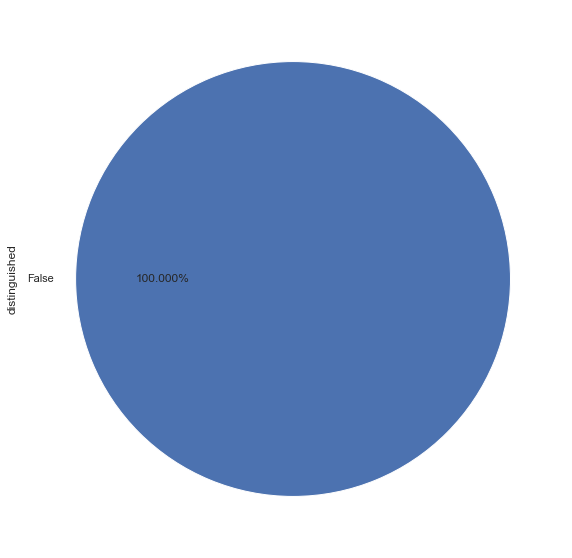

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [31]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    118342
True       3842
Name: edited, dtype: int64


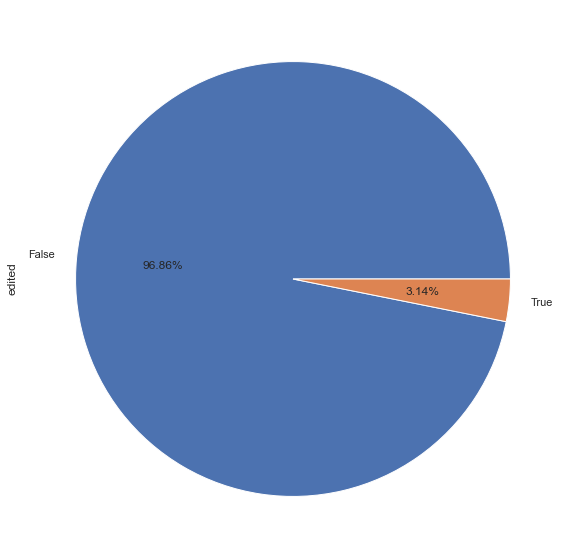

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [33]:
df["score"].mean()

13.961361553067505

In [34]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
55510,kamikasei,Why on Earth would you imagine that a plan you...,False,2021-11-14 11:38:34,False,False,0,hkksjnf,t3_qtm7tz,t3_qtm7tz,4324,False,11,14,2021,Why on Earth would you imagine that a plan you...,75
104569,hopingtothrive,I don't want to marry her Do both of you a fav...,False,2021-11-26 19:39:01,False,True,0,hm6sml7,t3_r2ukiw,t3_r2ukiw,4214,False,19,26,2021,I don t want to marry her Do both of you a fav...,68
13008,nyorifamiliarspirit,I think the best thing you can do is get Riley...,False,2021-11-03 21:20:33,False,False,0,hj79o6h,t3_qm31j1,t3_qm31j1,3853,False,21,3,2021,I think the best thing you can do is get Riley...,28
55893,pornswhiteknight,To be blunt life doesn’t give a shit about you...,False,2021-11-14 14:53:48,False,False,1,hkld9ej,t3_qtm7tz,t3_qtm7tz,3629,False,14,14,2021,To be blunt life doesn t give a shit about you...,139
85934,Malbethion,"“My mom has a home, and my dad has a home, but...",False,2021-11-22 01:07:45,False,False,0,hlkz8tn,t3_qz3y0l,t3_qz3y0l,3499,False,1,22,2021,My mom has a home and my dad has a home but I ...,59
61246,dancing_chinese_kid,He's a 34-year-old trying to talk a teenager i...,False,2021-11-15 18:39:01,False,False,0,hkr1cb5,t3_qun3z4,t3_qun3z4,3443,False,18,15,2021,He s a year old trying to talk a teenager into...,24
17084,mermaidbait,He doesn't want a relationship with you as a p...,False,2021-11-04 21:10:18,False,False,0,hjc07bk,t3_qmui09,t3_qmui09,3327,False,21,4,2021,He doesn t want a relationship with you as a p...,52
107041,stappernn,Dude stop giving her money. She needs professi...,False,2021-11-27 09:03:31,False,False,0,hm98oub,t3_r38t5a,t3_r38t5a,3106,False,9,27,2021,Dude stop giving her money . She needs profess...,17
21908,degeneratescholar,You just learned your neighbor isn’t that good...,False,2021-11-06 02:33:21,False,False,0,hji3aab,t3_qnqo36,t3_qnqo36,3050,False,2,6,2021,You just learned your neighbor isn t that good...,62
52824,DangerouslyDia,Immediately tell your husband. This is an extr...,False,2021-11-13 17:32:51,False,False,0,hkh8fty,t3_qt5xe6,t3_qt5xe6,3019,False,17,13,2021,Immediately tell your husband . This is an ext...,56


In [35]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
93639,throwaway70266,I’m not afraid of him. I just don’t like to ma...,False,2021-11-23 21:48:40,False,False,0,hltlc04,t3_r0o1jh,t1_hltklr0,-406,False,21,23,2021,I m not afraid of him . I just don t like to m...,23
38784,Optimal-Success-5253,Sounds like gf is a snoop that searches her bf...,False,2021-11-09 22:47:00,False,False,0,hjzuv3y,t3_qqf74n,t1_hjztkuu,-317,False,22,9,2021,Sounds like gf is a snoop that searches her bf...,58
110446,Brewcitymke,It was a mutual decision,False,2021-11-28 02:20:53,False,False,0,hmcn522,t3_r3sz16,t1_hmcm45w,-260,False,2,28,2021,It was a mutual decision,5
93744,throwaway70266,Just for safety like Snapchat location or appl...,False,2021-11-23 22:08:29,False,False,0,hltoc1b,t3_r0o1jh,t1_hltmw8o,-200,False,22,23,2021,Just for safety like Snapchat location or appl...,63
33187,DazzlingRegister9275,Yeah whats what I thought. He probably isn't t...,False,2021-11-08 19:48:06,False,False,0,hjuck6i,t3_qpkz58,t1_hjuaz3y,-172,False,19,8,2021,Yeah whats what I thought . He probably isn t ...,38
56536,ThrowRAjimmyj,why do you want to get married between 30 and ...,False,2021-11-14 17:44:33,False,False,0,hkm14zi,t3_qtm7tz,t1_hklwlqe,-166,False,17,14,2021,why do you want to get married between and I w...,120
56915,ThrowRAjimmyj,what about her plan? what if she dosent want ...,False,2021-11-14 19:08:56,False,False,0,hkmeo9d,t3_qtm7tz,t1_hkmd2y1,-157,False,19,14,2021,what about her plan what if she dosent want to...,42
93715,throwaway70266,I just think it’s him being worried about me b...,False,2021-11-23 22:02:53,False,False,0,hltni2z,t3_r0o1jh,t1_hltmpwm,-151,False,22,23,2021,I just think it s him being worried about me b...,115
91060,Comprehensive_Math56,"The relationship is great other than this, tho...",False,2021-11-23 08:40:09,False,False,0,hlqx85h,t3_r08kny,t1_hlqwwj9,-144,False,8,23,2021,The relationship is great other than this thou...,38
88579,dabesdiabetic,"Weird, but you do you.",False,2021-11-22 17:40:57,False,False,0,hlnv0c5,t3_qzmzqb,t1_hlnpmai,-140,False,17,22,2021,Weird but you do you .,6


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

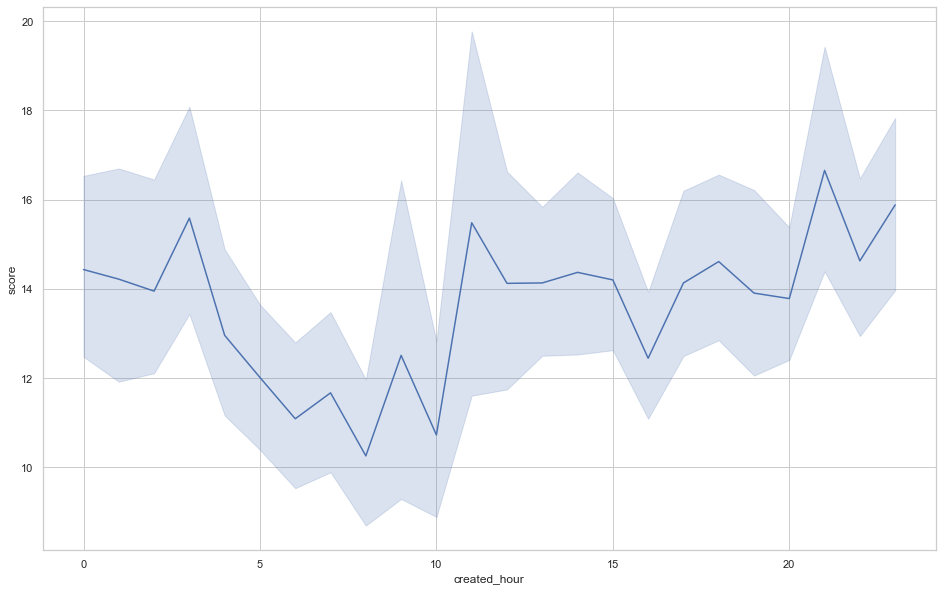

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on commtents

<AxesSubplot:xlabel='created_day', ylabel='score'>

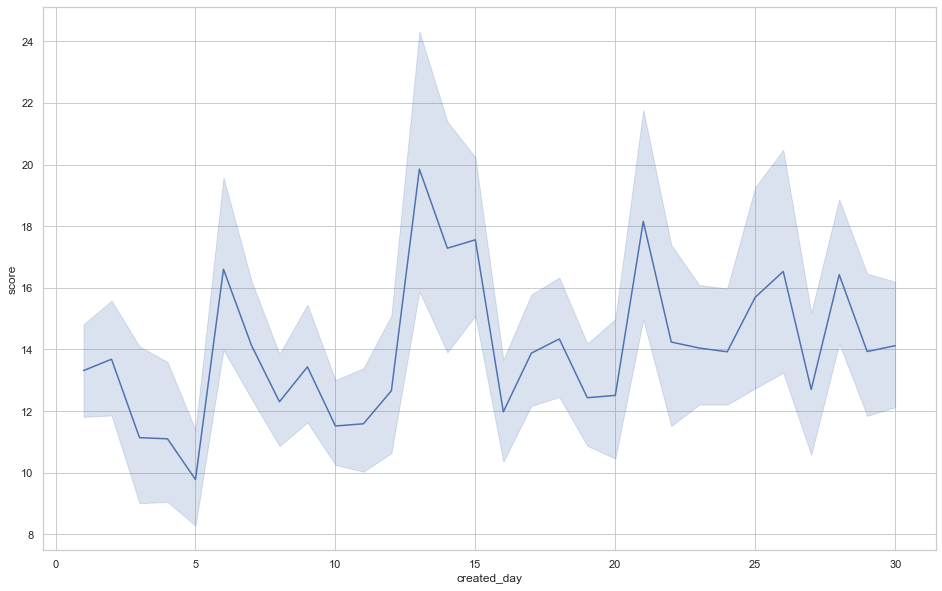

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

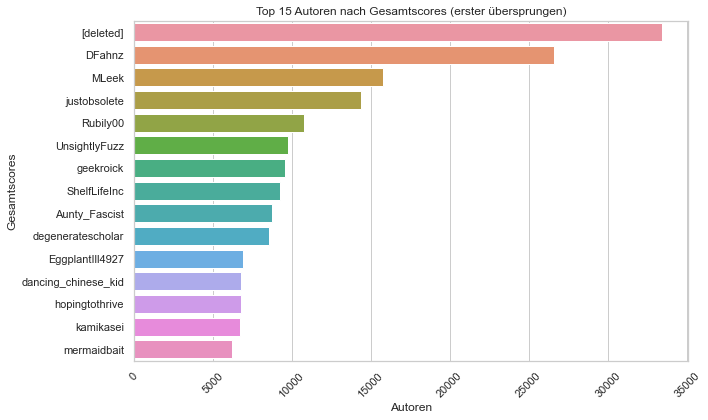

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

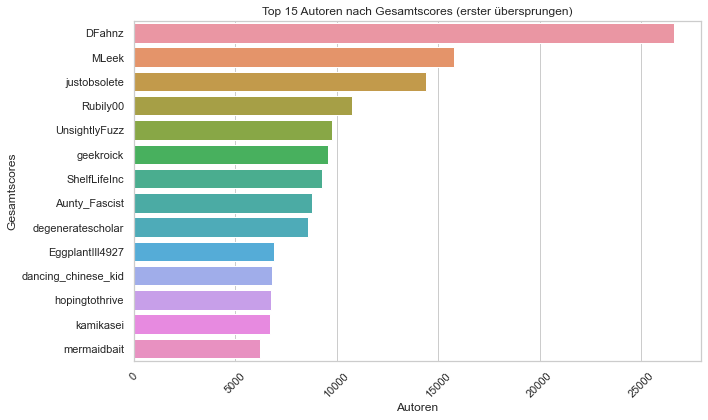

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Entferne den Autor "[deleted]" aus den Top-Autoren
top_authors = top_authors[top_authors.index != '[deleted]']

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

In [40]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,122184.000000,122184.000000,122184.000000,122184.000000,122184.0,122184.000000
mean,0.000663,13.961362,12.752562,15.234867,2021.0,72.962908
std,0.028744,75.999052,7.292497,8.760482,0.0,81.731227
min,0.000000,-406.000000,0.000000,1.000000,2021.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2021.0,23.000000
50%,0.000000,2.000000,14.000000,15.000000,2021.0,47.000000
75%,0.000000,7.000000,19.000000,23.000000,2021.0,93.000000
max,3.000000,4324.000000,23.000000,30.000000,2021.0,1638.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122184 entries, 0 to 122195
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            122184 non-null  object
 1   body              122184 non-null  object
 2   controversiality  122184 non-null  bool  
 3   created_utc       122184 non-null  object
 4   distinguished     122184 non-null  bool  
 5   edited            122184 non-null  bool  
 6   gilded            122184 non-null  int64 
 7   id                122184 non-null  object
 8   link_id           122184 non-null  object
 9   parent_id         122184 non-null  object
 10  score             122184 non-null  int64 
 11  stickied          122184 non-null  bool  
 12  created_hour      122184 non-null  int64 
 13  created_day       122184 non-null  int64 
 14  created_year      122184 non-null  int64 
 15  clean_text        122184 non-null  object
 16  comment_len       122184 non-null  int

In [42]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,122184.000000,122184.000000,122184.000000,122184.000000,122184.0,122184.000000
mean,0.000663,13.961362,12.752562,15.234867,2021.0,72.962908
std,0.028744,75.999052,7.292497,8.760482,0.0,81.731227
min,0.000000,-406.000000,0.000000,1.000000,2021.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2021.0,23.000000
50%,0.000000,2.000000,14.000000,15.000000,2021.0,47.000000
75%,0.000000,7.000000,19.000000,23.000000,2021.0,93.000000
max,3.000000,4324.000000,23.000000,30.000000,2021.0,1638.000000


# Save cleaned general data

In [43]:
df.to_csv("relationship_21_comments_EDA_clean.csv",index=False,sep=";")

In [44]:
import pandas as pd
test_author=pd.read_csv("relationship_21_comments_EDA_clean.csv",sep=";")
print("Anzahl der Authoren==",test_author['author'].nunique())

Anzahl der Authoren== 27616


In [45]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122184 entries, 0 to 122183
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            122184 non-null  object
 1   body              122184 non-null  object
 2   controversiality  122184 non-null  bool  
 3   created_utc       122184 non-null  object
 4   distinguished     122184 non-null  bool  
 5   edited            122184 non-null  bool  
 6   gilded            122184 non-null  int64 
 7   id                122184 non-null  object
 8   link_id           122184 non-null  object
 9   parent_id         122184 non-null  object
 10  score             122184 non-null  int64 
 11  stickied          122184 non-null  bool  
 12  created_hour      122184 non-null  int64 
 13  created_day       122184 non-null  int64 
 14  created_year      122184 non-null  int64 
 15  clean_text        122184 non-null  object
 16  comment_len       122184 non-null  int

In [46]:
test_author.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,122184.000000,122184.000000,122184.000000,122184.000000,122184.0,122184.000000
mean,0.000663,13.961362,12.752562,15.234867,2021.0,72.962908
std,0.028744,75.999052,7.292497,8.760482,0.0,81.731227
min,0.000000,-406.000000,0.000000,1.000000,2021.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2021.0,23.000000
50%,0.000000,2.000000,14.000000,15.000000,2021.0,47.000000
75%,0.000000,7.000000,19.000000,23.000000,2021.0,93.000000
max,3.000000,4324.000000,23.000000,30.000000,2021.0,1638.000000
